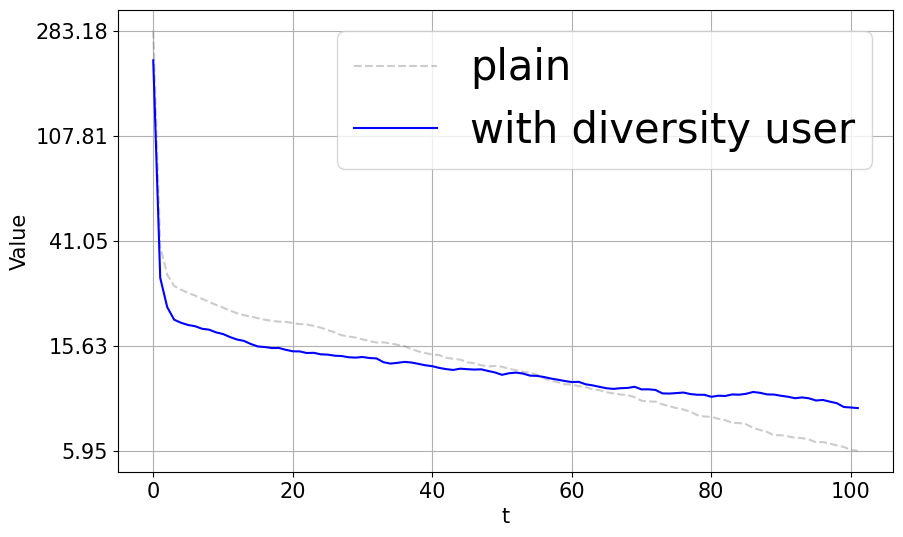

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSVファイルの読み込み（0行目をスキップ）
file_path_plain = "results_plain/disaggStepTwitter.csv"  # 点線用
file_path_div = "results_div/disaggStepTwitter.csv"      # 実線用
file_path_div2 = "results_div2/disaggStepTwitter.csv"    # 追加

# データの読み込み
df_plain = pd.read_csv(file_path_plain, skiprows=1, header=None, names=["lambda", "step", "value"])
df_div = pd.read_csv(file_path_div, skiprows=1, header=None, names=["lambda", "step", "value"])
df_div2 = pd.read_csv(file_path_div2, skiprows=1, header=None, names=["lambda", "step", "value"])

# λ=0.04 のデータのみ抽出
df_plain = df_plain[df_plain["lambda"] == 0.04]
df_div = df_div[df_div["lambda"] == 0.04]
df_div2 = df_div2[df_div2["lambda"] == 0.04]

# プロットの準備
plt.figure(figsize=(10, 6))

# 点線（results_plain）
plt.plot(df_plain["step"], np.log10(df_plain["value"]), linestyle="--", label="plain", alpha=0.4, color="gray")

# 実線（results_div）
plt.plot(df_div["step"], np.log10(df_div["value"]), linestyle="-", label="with diversity user", color="blue")

# 破線（results_div2）
#plt.plot(df_div2["step"], np.log10(df_div2["value"]), linestyle="-.", label="another diversity setting", color="green")

# グラフの設定
plt.xlabel("t", fontsize=15)
plt.ylabel("Value", fontsize=15)
plt.grid()
plt.legend(fontsize=30)  # 凡例を追加

# Y軸の目盛りを元の値で表示
min_value = min(df_plain["value"].min(), df_div["value"].min(), df_div2["value"].min())
max_value = max(df_plain["value"].max(), df_div["value"].max(), df_div2["value"].max())
original_values = np.geomspace(min_value, max_value, num=5)  # 幾何間隔で目盛りを設定
plt.yticks(np.log10(original_values), [f"{v:.2f}" for v in original_values], fontsize=15)

plt.xticks(fontsize=15)

plt.show()


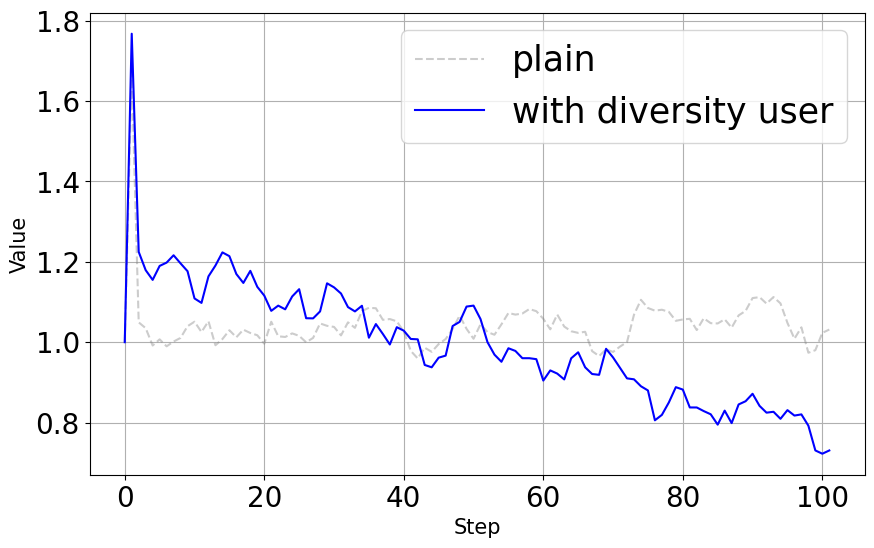

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み（0行目をスキップ）
file_path_plain = "results_plain/gpplsStepTwitter.csv"  # 点線用
file_path_div = "results_div/gpplsStepTwitter.csv"      # 実線用
file_path_div2 = "results_div2/gpplsStepTwitter.csv"    # 追加

# データの読み込み
df_plain = pd.read_csv(file_path_plain, skiprows=1, header=None, names=["lambda", "step", "value"])
df_div = pd.read_csv(file_path_div, skiprows=1, header=None, names=["lambda", "step", "value"])
df_div2 = pd.read_csv(file_path_div2, skiprows=1, header=None, names=["lambda", "step", "value"])

# λ=0.04 のデータのみを抽出
df_plain = df_plain[df_plain["lambda"] == 0.04]
df_div = df_div[df_div["lambda"] == 0.04]
df_div2 = df_div2[df_div2["lambda"] == 0.04]

# プロットの準備
plt.figure(figsize=(10, 6))

# 点線（results_plain）
plt.plot(df_plain["step"], df_plain["value"], linestyle="--", label="plain", alpha=0.4, color="gray")

# 実線（results_div）
plt.plot(df_div["step"], df_div["value"], linestyle="-", label="with diversity user", color="blue")

# 破線（results_div2）
#plt.plot(df_div2["step"], df_div2["value"], linestyle="-.", label="another diversity setting", color="green")

# グラフの設定
plt.xlabel("Step", fontsize=15)
plt.ylabel("Value", fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.legend(fontsize=25)  # 凡例を追加
plt.show()


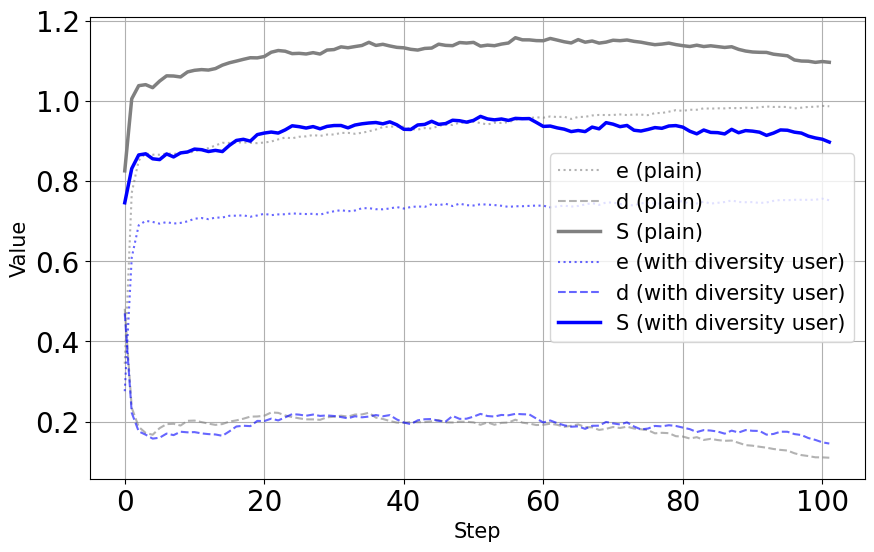

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み（0行目をスキップ）
file_paths = {
    "plain": ["results_plain/stfsStepTwitter.csv", "results_plain/stfsStepTwitter2.csv"],  # 点線/破線
    "with diversity user": ["results_div/stfsStepTwitter.csv", "results_div/stfsStepTwitter2.csv"],  # 点線/破線
}

# 固定のカラーマップ
colors = {"plain": "gray", "with diversity user": "blue"}
linestyles_individual = [":", "--"]  # 各データの線種（1本目: 点線、2本目: 破線）
linestyle_sum = "-"  # 合計の線種（実線）

# データの読み込みとフィルタリング（λ=0.04 のみ）
dfs = {}
for key, paths in file_paths.items():
    df_list = [pd.read_csv(p, skiprows=1, header=None, names=["lambda", "step", "value"]) for p in paths]
    df_filtered = [df[df["lambda"] == 0.04] for df in df_list]  # λ=0.04 のみ抽出
    dfs[key] = df_filtered  # 2 つの DataFrame をリストで格納

# プロットの準備
plt.figure(figsize=(10, 6))

# plain のデータを描画
linestyles_individual = [":", "--"]  # 1本目を点線、2本目を破線にする
labels = ["e (plain)", "d (plain)"]  # 1つ目と2つ目のラベル

for i, df in enumerate(dfs["plain"]):
    plt.plot(df["step"], df["value"],
             linestyle=linestyles_individual[i], color=colors["plain"],
             alpha=0.6, label=labels[i])  # ラベルを個別に設定

# plain の合計値を計算して描画
df_plain_sum = dfs["plain"][0].copy()
df_plain_sum["value"] += dfs["plain"][1]["value"].values

plt.plot(df_plain_sum["step"], df_plain_sum["value"],
         linestyle=linestyle_sum, color=colors["plain"],
         linewidth=2.5, alpha=1.0, label="S (plain)")

# plain のデータを描画
linestyles_individual = [":", "--"]  # 1本目を点線、2本目を破線にする
labels = ["e (with diversity user)", "d (with diversity user)"]  # 1つ目と2つ目のラベル

for i, df in enumerate(dfs["with diversity user"]):
    plt.plot(df["step"], df["value"],
             linestyle=linestyles_individual[i], color=colors["with diversity user"],
             alpha=0.6, label=labels[i])  # ラベルを個別に設定

# with diversity user の合計値を計算して描画
df_div_sum = dfs["with diversity user"][0].copy()
df_div_sum["value"] += dfs["with diversity user"][1]["value"].values

plt.plot(df_div_sum["step"], df_div_sum["value"],
         linestyle=linestyle_sum, color=colors["with diversity user"],
         linewidth=2.5, alpha=1.0, label="S (with diversity user)")

# グラフの設定
plt.xlabel("Step", fontsize=15)
plt.ylabel("Value", fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.legend(fontsize=15)  # 凡例を追加
plt.show()


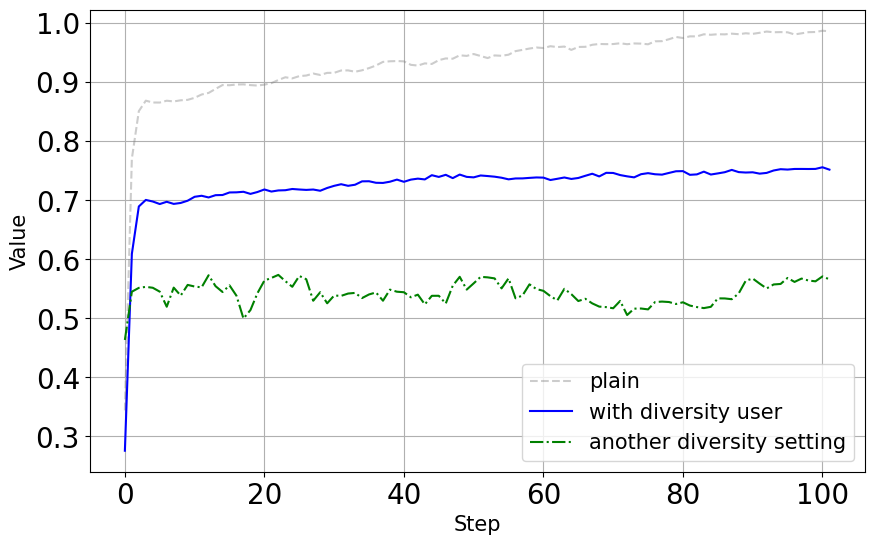

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み（0行目をスキップ）
file_path_plain = "results_plain/stfsStepTwitter.csv"  # 点線用
file_path_plain1 = "results_plain/stfsStepTwitter2.csv"
file_path_div = "results_div/stfsStepTwitter.csv"      # 実線用
file_path_div1 = "results_div/stfsStepTwitter2.csv"  
file_path_div2 = "results_div2/stfsStepTwitter.csv"    # 追加

# データの読み込み
df_plain = pd.read_csv(file_path_plain, skiprows=1, header=None, names=["lambda", "step", "value"])
df_div = pd.read_csv(file_path_div, skiprows=1, header=None, names=["lambda", "step", "value"])
df_div2 = pd.read_csv(file_path_div2, skiprows=1, header=None, names=["lambda", "step", "value"])

# λ=0.04 のデータのみを抽出
df_plain = df_plain[df_plain["lambda"] == 0.04]
df_div = df_div[df_div["lambda"] == 0.04]
df_div2 = df_div2[df_div2["lambda"] == 0.04]

# プロットの準備
plt.figure(figsize=(10, 6))

# 点線（results_plain）
plt.plot(df_plain["step"], df_plain["value"], linestyle="--", label="plain", alpha=0.4, color="gray")

# 実線（results_div）
plt.plot(df_div["step"], df_div["value"], linestyle="-", label="with diversity user", color="blue")

# 破線（results_div2）
plt.plot(df_div2["step"], df_div2["value"], linestyle="-.", label="another diversity setting", color="green")

# グラフの設定
plt.xlabel("Step", fontsize=15)
plt.ylabel("Value", fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.legend(fontsize=15)  # 凡例を追加
plt.show()


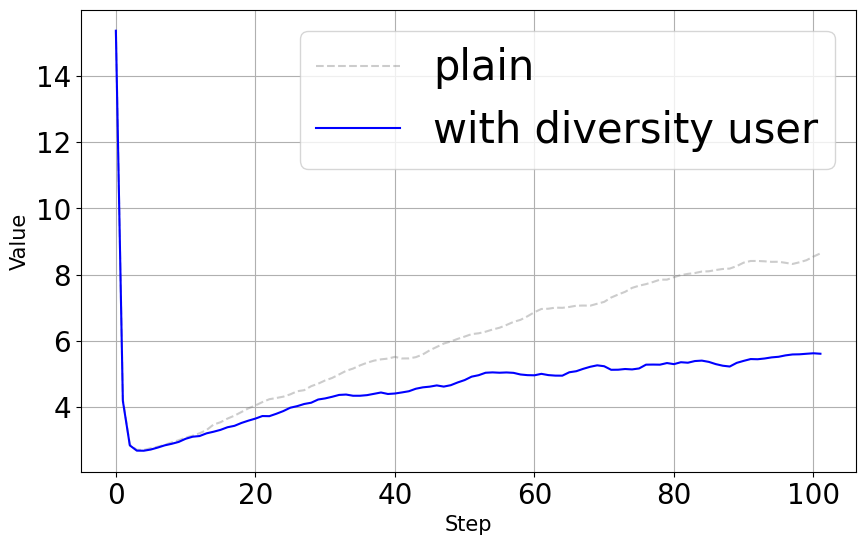

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み（0行目をスキップ）
file_path_plain = "results_plain/udvStepTwitter.csv"  # 点線用
file_path_div = "results_div/udvStepTwitter.csv"  # 実線用

# データの読み込み
df_plain = pd.read_csv(file_path_plain, skiprows=1, header=None, names=["lambda", "step", "value"])
df_div = pd.read_csv(file_path_div, skiprows=1, header=None, names=["lambda", "step", "value"])

# λ=0.04 のデータのみを抽出
df_plain = df_plain[df_plain["lambda"] == 0.04]
df_div = df_div[df_div["lambda"] == 0.04]

# プロットの準備
plt.figure(figsize=(10, 6))

# 点線（results_plain）
plt.plot(df_plain["step"], df_plain["value"], linestyle="--", label="plain", alpha=0.4, color="gray")

# 実線（results_div）
plt.plot(df_div["step"], df_div["value"], linestyle="-", label="with diversity user", color="blue")

# グラフの設定
plt.xlabel("Step", fontsize=15)
plt.ylabel("Value", fontsize=15)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=30)  # 凡例を追加
plt.show()
